In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,  # type: ignore
                     header=None)  # type: ignore
X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape, y.shape

((506, 12), (506,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

In [5]:
# Initialize and train FONN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Increased hidden layer size
output_dim = 1
num_trees_input = 10
epochs = 40000  # Increased number of epochs
learning_rate = 0.0001  # Decreased learning rate

start_time = time.time()
fonn1 = FONN1(input_dim, hidden_dim, output_dim,
              num_trees_input, X_train, y_train)
fonn1.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
fonn1_train_time = end_time - start_time

Epoch 0, Loss: 606.7472915082359
Epoch 100, Loss: 600.3042566656288
Epoch 200, Loss: 595.1324034141517
Epoch 300, Loss: 590.1359769260636
Epoch 400, Loss: 585.1880539034689
Epoch 500, Loss: 580.2735420453739
Epoch 600, Loss: 575.3878850840986
Epoch 700, Loss: 570.5291734563314
Epoch 800, Loss: 565.6964467487564
Epoch 900, Loss: 560.8891611841284
Epoch 1000, Loss: 556.106982019872
Epoch 1100, Loss: 551.3496899400287
Epoch 1200, Loss: 546.6171341522719
Epoch 1300, Loss: 541.9092069182483
Epoch 1400, Loss: 537.2258288149686
Epoch 1500, Loss: 532.5669397543775
Epoch 1600, Loss: 527.9324932725054
Epoch 1700, Loss: 523.322452764705
Epoch 1800, Loss: 518.7367889263463
Epoch 1900, Loss: 514.1754779662001
Epoch 2000, Loss: 509.63850033002444
Epoch 2100, Loss: 505.1258397699066
Epoch 2200, Loss: 500.6374826533583
Epoch 2300, Loss: 496.17341744208403
Epoch 2400, Loss: 491.73363429304067
Epoch 2500, Loss: 487.3181247490971
Epoch 2600, Loss: 482.9268814963248
Epoch 2700, Loss: 478.55989817151305
Ep

In [6]:
# Initialize and train FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.001

start_time = time.time()
fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden)
fonn2.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
fonn2_train_time = end_time - start_time

Epoch 0, Loss: 634.3113108884287
Epoch 100, Loss: 10.795863093233361
Epoch 200, Loss: 9.48856752097019
Epoch 300, Loss: 11.55020439835378
Epoch 400, Loss: 11.162689884782395
Epoch 500, Loss: 11.57438808597193
Epoch 600, Loss: 10.3348644731841
Epoch 700, Loss: 10.4376112382101
Epoch 800, Loss: 7.485761127725074
Epoch 900, Loss: 10.13495351687015


In [7]:
# Initialize and train TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Hidden layer size
output_dim = 1
epochs = 40000  # Number of epochs
learning_rate = 0.0001  # Learning rate

start_time = time.time()
treenn1 = TREENN1(input_dim, hidden_dim, output_dim, X_train, y_train)
treenn1.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
treenn1_train_time = end_time - start_time

Epoch 0, Loss: 606.7582694877701
Epoch 100, Loss: 604.4667488291765
Epoch 200, Loss: 600.6769661477691
Epoch 300, Loss: 595.8287183136292
Epoch 400, Loss: 590.4835660599755
Epoch 500, Loss: 584.9695589751451
Epoch 600, Loss: 579.4557550179029
Epoch 700, Loss: 574.0201312210847
Epoch 800, Loss: 568.6915737889957
Epoch 900, Loss: 563.4740602686513
Epoch 1000, Loss: 558.3601630209382
Epoch 1100, Loss: 553.338281039296
Epoch 1200, Loss: 548.3963860121721
Epoch 1300, Loss: 543.5302712255929
Epoch 1400, Loss: 538.7390805766057
Epoch 1500, Loss: 534.0072999658248
Epoch 1600, Loss: 529.3194631124502
Epoch 1700, Loss: 524.6678321282609
Epoch 1800, Loss: 520.0483007761585
Epoch 1900, Loss: 515.4584735096637
Epoch 2000, Loss: 510.89685238561344
Epoch 2100, Loss: 506.36244942970245
Epoch 2200, Loss: 501.8545847740722
Epoch 2300, Loss: 497.3727740727859
Epoch 2400, Loss: 492.9166621562499
Epoch 2500, Loss: 488.4859821224649
Epoch 2600, Loss: 484.0805291357755
Epoch 2700, Loss: 479.7001430931758
Epo

In [8]:
# Initialize and train TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
epochs = 1000
learning_rate = 0.001

start_time = time.time()
treenn2 = TREENN2(input_dim, hidden_dim, output_dim)
treenn2.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
treenn2_train_time = end_time - start_time

Epoch 0, Loss: 622.9793765675771
Epoch 100, Loss: 502.0210304562173
Epoch 200, Loss: 388.0261497255056
Epoch 300, Loss: 279.92010954024477
Epoch 400, Loss: 188.05944093185275
Epoch 500, Loss: 112.4116562266821
Epoch 600, Loss: 56.14383045474525
Epoch 700, Loss: 22.06703744551879
Epoch 800, Loss: 9.043354413983923
Epoch 900, Loss: 10.116437702040878


In [9]:
# Measure computational time and evaluate the FONN1 model
start_time = time.time()
fonn1_predictions = fonn1.forward(X_test)
end_time = time.time()
fonn1_comp_time = end_time - start_time

fonn1_r2 = r2_score(y_test, fonn1_predictions)
fonn1_mae = mean_absolute_error(y_test, fonn1_predictions)
fonn1_mse = mean_squared_error(y_test, fonn1_predictions)

results["FONN1"] = {"R² Score": fonn1_r2, "MAE": fonn1_mae, "MSE": fonn1_mse,
                    "Train Time (s)": fonn1_train_time, "Comp Time (s)": fonn1_comp_time}

In [10]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
fonn2_predictions = fonn2.forward(X_test, y_test)
end_time = time.time()
fonn2_comp_time = end_time - start_time

fonn2_r2 = r2_score(y_test, fonn2_predictions)
fonn2_mae = mean_absolute_error(y_test, fonn2_predictions)
fonn2_mse = mean_squared_error(y_test, fonn2_predictions)

results["FONN2"] = {"R² Score": fonn2_r2, "MAE": fonn2_mae, "MSE": fonn2_mse,
                    "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_comp_time}

# Measure computational time and predict house prices using the decision trees in the hidden layer
start_time = time.time()
fonn2_tree_predictions = fonn2.tree_predict(X_test)
end_time = time.time()
fonn2_tree_comp_time = end_time - start_time

fonn2_tree_r2 = r2_score(y_test, fonn2_tree_predictions)
fonn2_tree_mae = mean_absolute_error(y_test, fonn2_tree_predictions)
fonn2_tree_mse = mean_squared_error(y_test, fonn2_tree_predictions)

results["Tree-based Predictions (FONN2)"] = {"R² Score": fonn2_tree_r2, "MAE": fonn2_tree_mae,
                                             "MSE": fonn2_tree_mse, "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_tree_comp_time}

In [11]:
# Combine 10 decision trees and evaluate the ensemble model
start_time = time.time()
trees = [DecisionTreeRegressor(max_depth=5, random_state=i).fit(
    X_train, y_train) for i in range(10)]
end_time = time.time()
ensemble_train_time = end_time - start_time

start_time = time.time()
ensemble_predictions = np.mean(
    [tree.predict(X_test) for tree in trees], axis=0)
end_time = time.time()
ensemble_comp_time = end_time - start_time

ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

results["Ensemble of 10 Trees"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae,
                                   "MSE": ensemble_mse, "Train Time (s)": ensemble_train_time, "Comp Time (s)": ensemble_comp_time}

In [12]:
# Measure computational time and evaluate the TREENN1 model
start_time = time.time()
treenn1_predictions = treenn1.forward(X_test)
end_time = time.time()
treenn1_comp_time = end_time - start_time

treenn1_r2 = r2_score(y_test, treenn1_predictions)
treenn1_mae = mean_absolute_error(y_test, treenn1_predictions)
treenn1_mse = mean_squared_error(y_test, treenn1_predictions)

results["TREENN1"] = {"R² Score": treenn1_r2, "MAE": treenn1_mae, "MSE": treenn1_mse,
                      "Train Time (s)": treenn1_train_time, "Comp Time (s)": treenn1_comp_time}

In [13]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
treenn2_predictions = treenn2.forward(X_test, y_test)
end_time = time.time()
treenn2_comp_time = end_time - start_time

treenn2_r2 = r2_score(y_test, treenn2_predictions)
treenn2_mae = mean_absolute_error(y_test, treenn2_predictions)
treenn2_mse = mean_squared_error(y_test, treenn2_predictions)

results["TREENN2"] = {"R² Score": treenn2_r2, "MAE": treenn2_mae,
                      "MSE": treenn2_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_comp_time}

# Measure computational time and predict house prices using the decision tree in the hidden layer
start_time = time.time()
treenn2_tree_predictions = treenn2.tree_hidden.predict(treenn2.a1)
end_time = time.time()
treenn2_tree_comp_time = end_time - start_time

treenn2_tree_r2 = r2_score(y_test, treenn2_tree_predictions)
treenn2_tree_mae = mean_absolute_error(y_test, treenn2_tree_predictions)
treenn2_tree_mse = mean_squared_error(y_test, treenn2_tree_predictions)

results["Tree-based Predictions (TREENN2)"] = {"R² Score": treenn2_tree_r2, "MAE": treenn2_tree_mae,
                                               "MSE": treenn2_tree_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_tree_comp_time}

In [14]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                  R² Score       MAE        MSE  \
Linear Regression                 0.629049  3.530902  27.203240   
Ridge Regression                  0.628946  3.527434  27.210799   
Lasso Regression                  0.583928  3.797634  30.512140   
ElasticNet Regression             0.576617  3.688701  31.048308   
Bayesian Ridge Regression         0.628346  3.509389  27.254824   
ARD Regression                    0.624592  3.533442  27.530074   
SGD Regressor                     0.617806  3.547062  28.027703   
Passive Aggressive Regressor      0.407794  4.430509  43.428734   
Support Vector Regression         0.647374  2.798191  25.859432   
MLP Regressor                     0.754212  3.019009  18.024539   
Random Forest Regressor           0.886802  2.115863   8.301222   
Gradient Boosting Regressor       0.917226  1.899354   6.070106   
XGBoost Regressor                 0.900123  1.931674   7.324366   
AdaBoost Regressor                0.817881  2.495554  13.35547

Tree 0 feature importances:
[3.40791438e-02 2.88226292e-03 2.07997164e-04 9.70803652e-02
 2.53978910e-02 1.74656413e-01 1.84735917e-02 1.09065591e-01
 4.87352594e-01 5.08041504e-02]
Tree 0 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_6 <= 0.01
|   |   |   |--- feature_1 <= -0.09
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_1 >  -0.09
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_6 >  0.01
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_6 <= 0.02
|   |   |   |   |   |--- value: [32.40]
|   |   |   |   |--- feature_6 >  0.02
|   |   |   |   |   |--- value: [35.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_0 <= -0.19
|   |   |   |--- feature_2 <= -0.00
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature

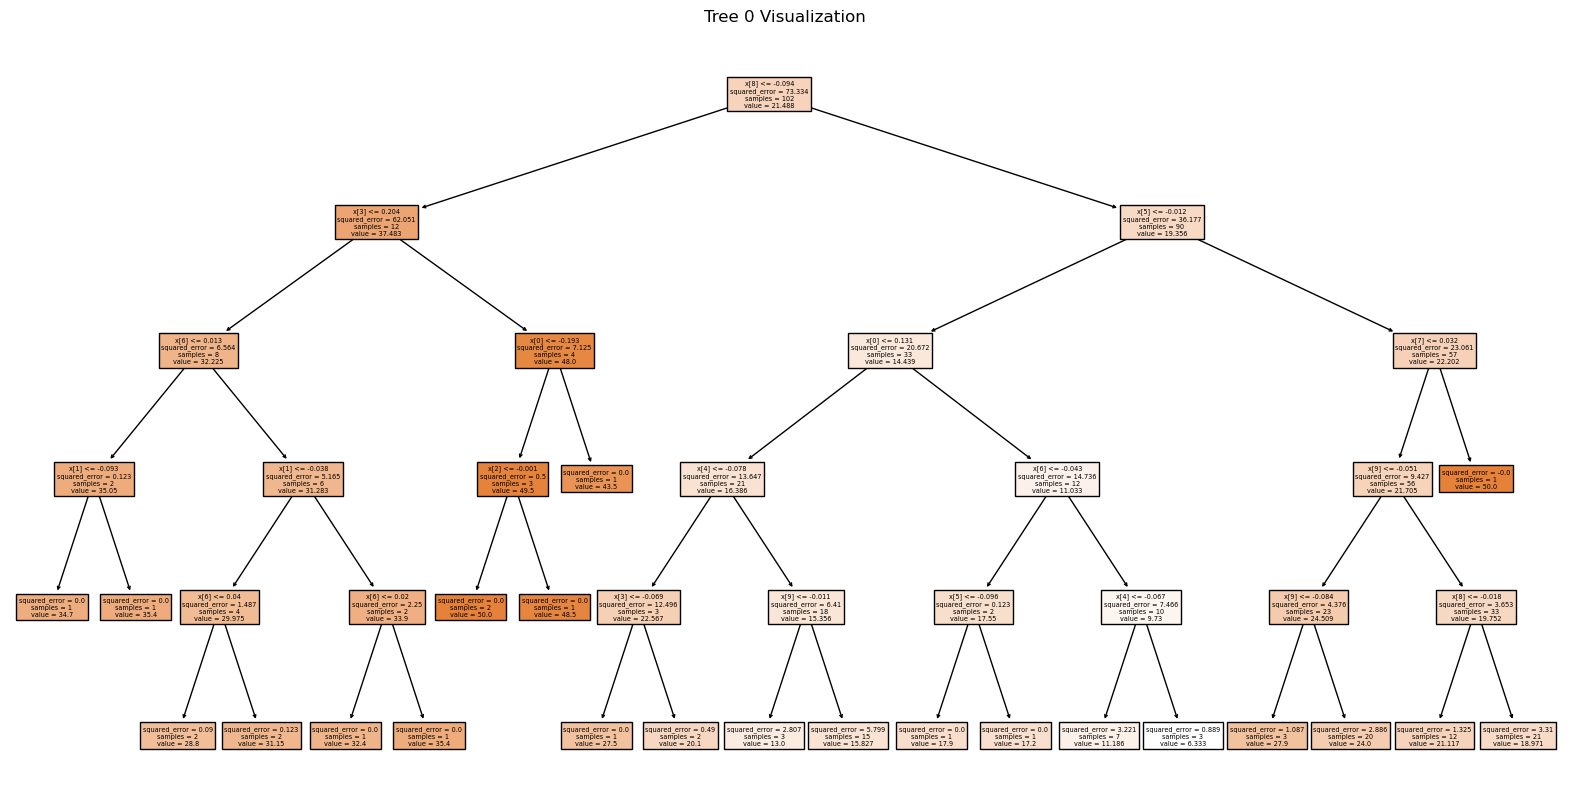

Tree 1 feature importances:
[5.68618025e-03 2.88226292e-03 2.07997164e-04 9.20181765e-02
 2.53978910e-02 1.74622440e-01 1.78496002e-02 1.09065591e-01
 4.91096543e-01 8.11733181e-02]
Tree 1 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_6 <= 0.01
|   |   |   |--- feature_1 <= -0.09
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_1 >  -0.09
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_6 >  0.01
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_0 <= -0.17
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_0 >  -0.17
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_8 <= -0.16
|   |   |   |--- feature_2 <= -0.00
|   |   |   |   |--- value: [50.00]
|   |   |   |--- featu

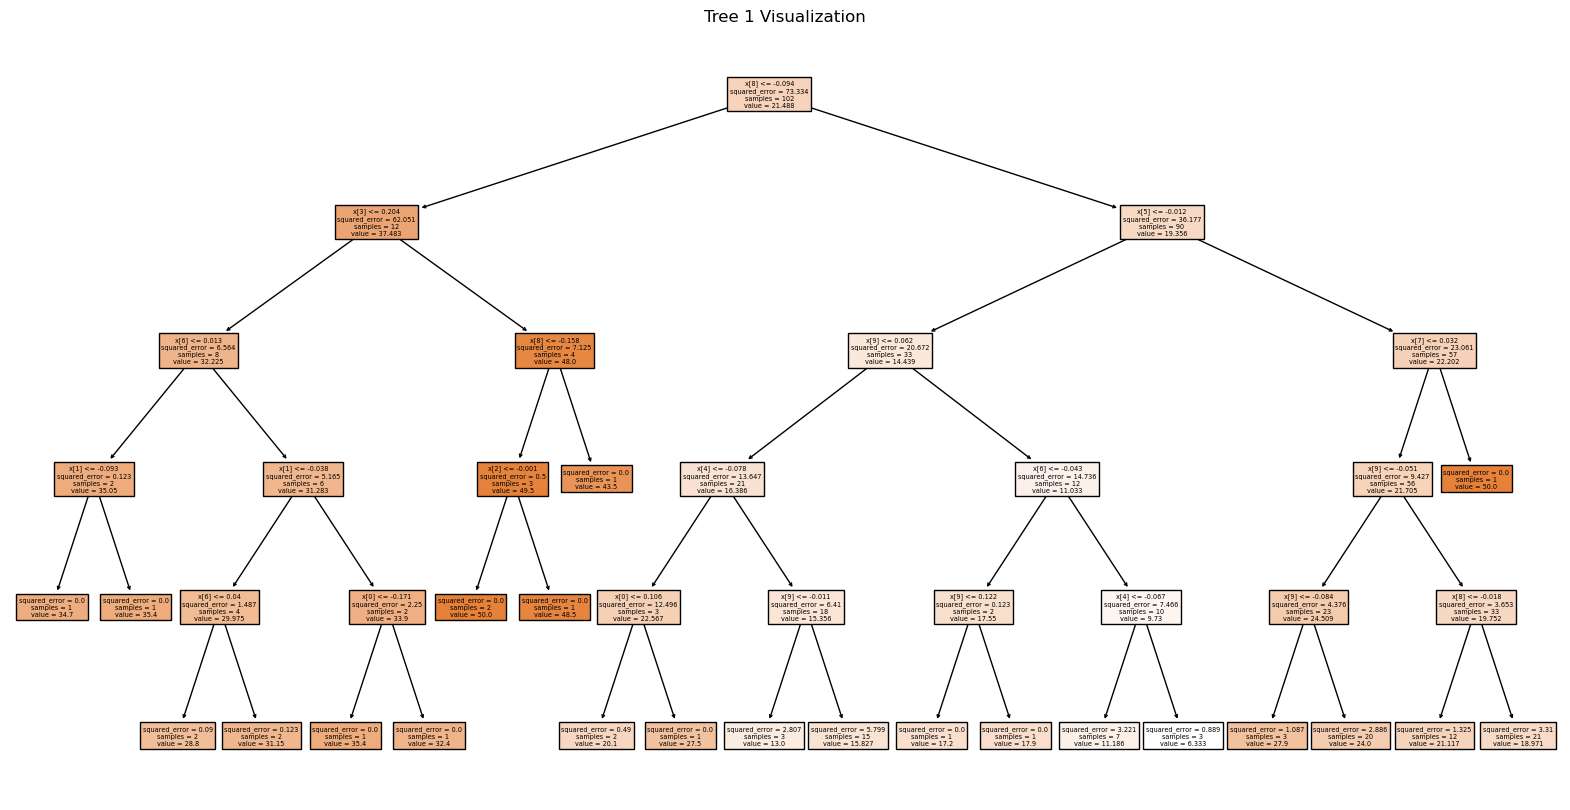

Tree 2 feature importances:
[0.         0.00579931 0.00083199 0.09201818 0.034238   0.17462244
 0.01493256 0.10906559 0.48735259 0.08113935]
Tree 2 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_1 <= -0.08
|   |   |   |--- feature_4 <= 0.06
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_4 >  0.06
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_1 >  -0.08
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_4 <= 0.07
|   |   |   |--- value: [43.50]
|   |   |--- feature_4 >  0.07
|   |   |   |--- feature_2 <= -0.00
|   |   |   |   |--- value: [50.00]
|  

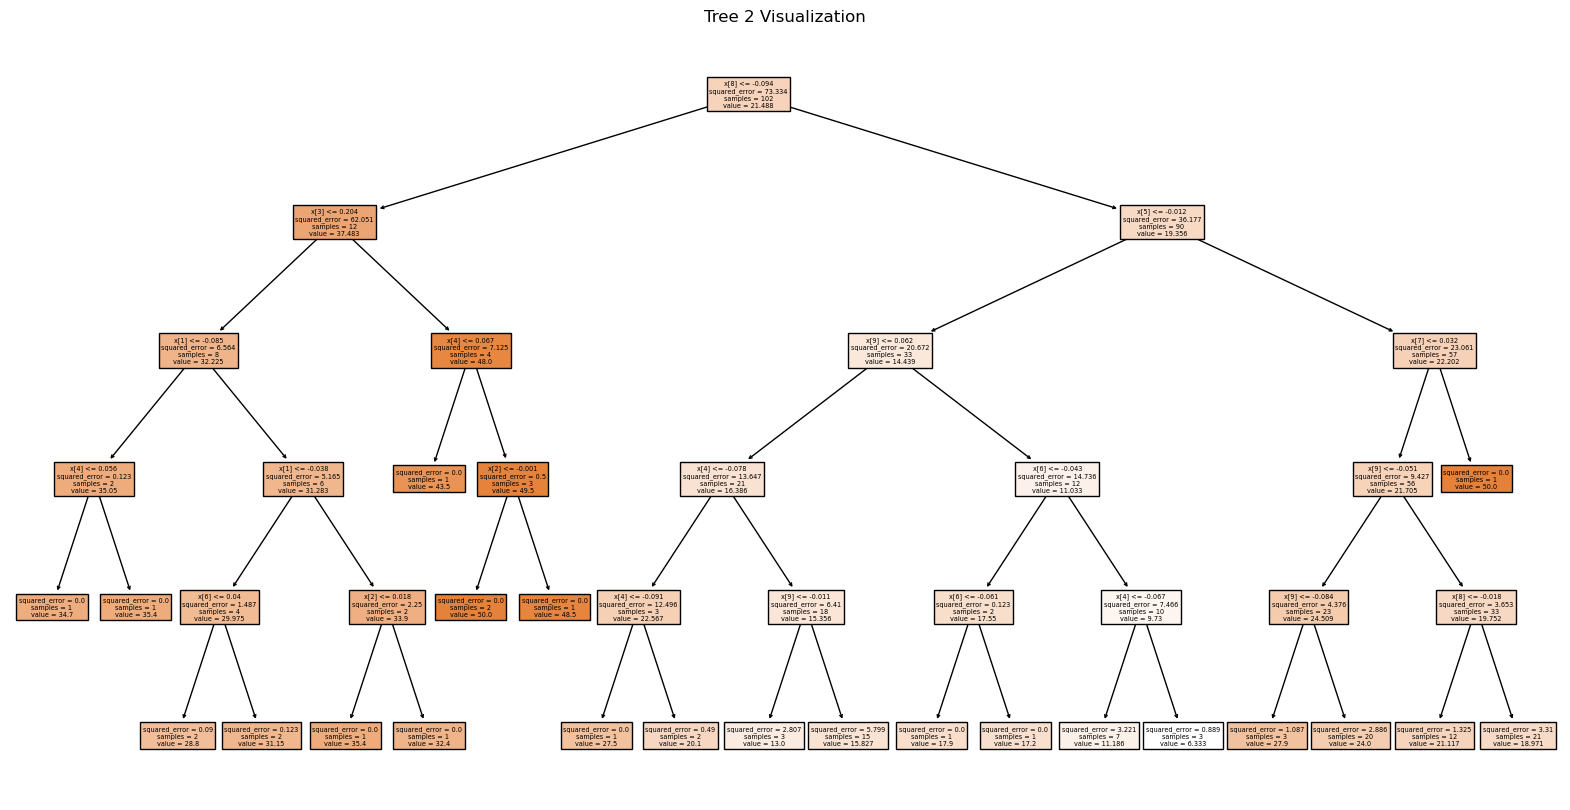

Tree 3 feature importances:
[2.07997164e-04 2.84829005e-03 4.36794045e-03 9.20181765e-02
 3.04600798e-02 1.74622440e-01 1.78496002e-02 1.09099564e-01
 4.87352594e-01 8.11733181e-02]
Tree 3 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_6 <= 0.01
|   |   |   |--- feature_7 <= -0.13
|   |   |   |   |--- value: [35.40]
|   |   |   |--- feature_7 >  -0.13
|   |   |   |   |--- value: [34.70]
|   |   |--- feature_6 >  0.01
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_2 <= 0.01
|   |   |   |--- feature_0 <= -0.22
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_

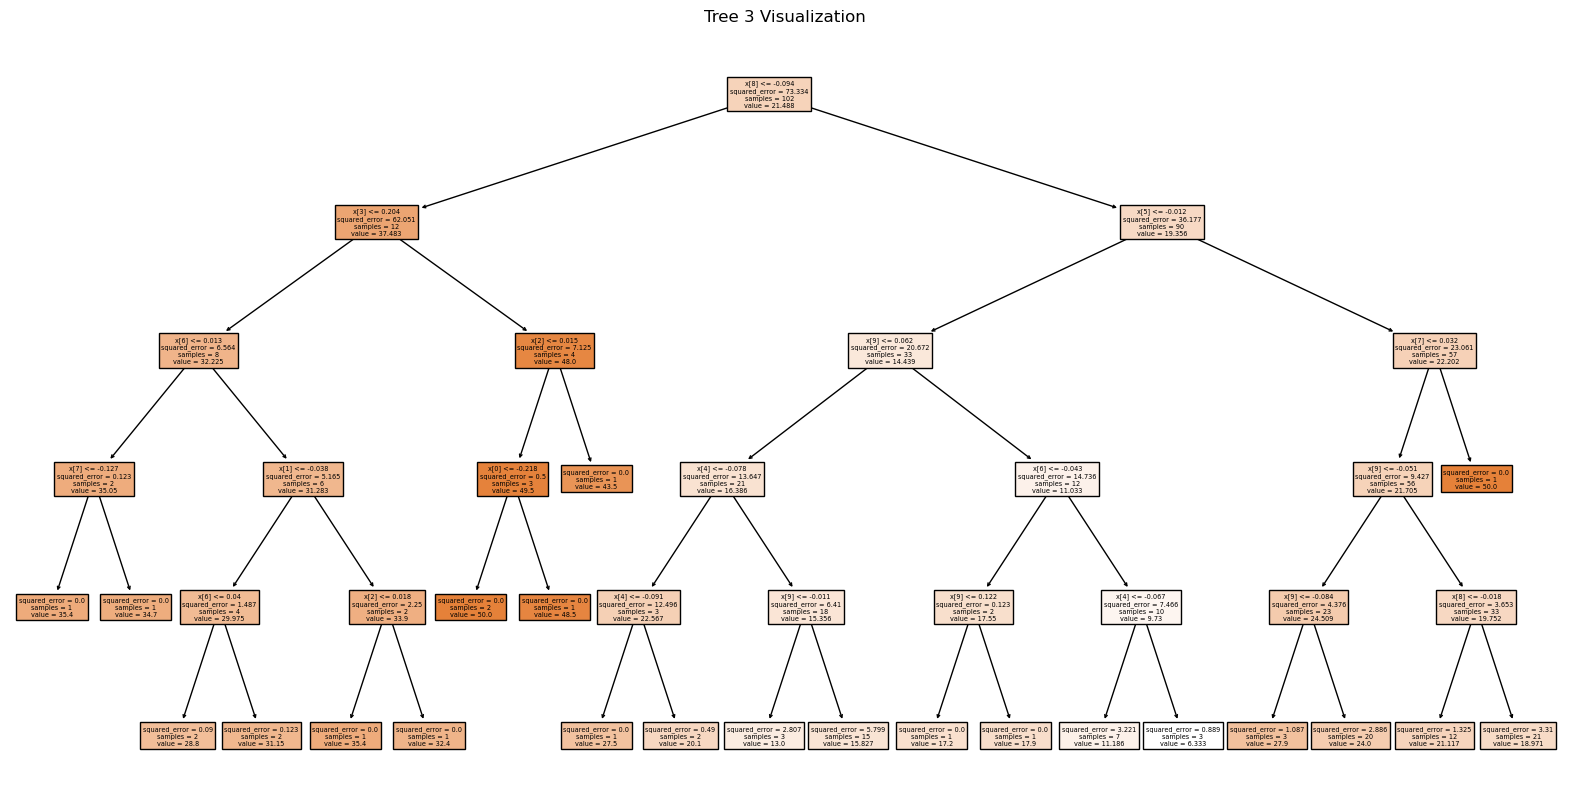

Tree 4 feature importances:
[0.         0.00347228 0.00395195 0.09201818 0.02539789 0.17465641
 0.02291179 0.10909956 0.48735259 0.08113935]
Tree 4 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_6 <= 0.01
|   |   |   |--- feature_7 <= -0.13
|   |   |   |   |--- value: [35.40]
|   |   |   |--- feature_7 >  -0.13
|   |   |   |   |--- value: [34.70]
|   |   |--- feature_6 >  0.01
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_1 <= -0.04
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_1 >  -0.04
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_2 <= 0.01
|   |   |   |--- feature_2 <= -0.00
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_2 >  -0.00
|   |   |   |   |--- value: 

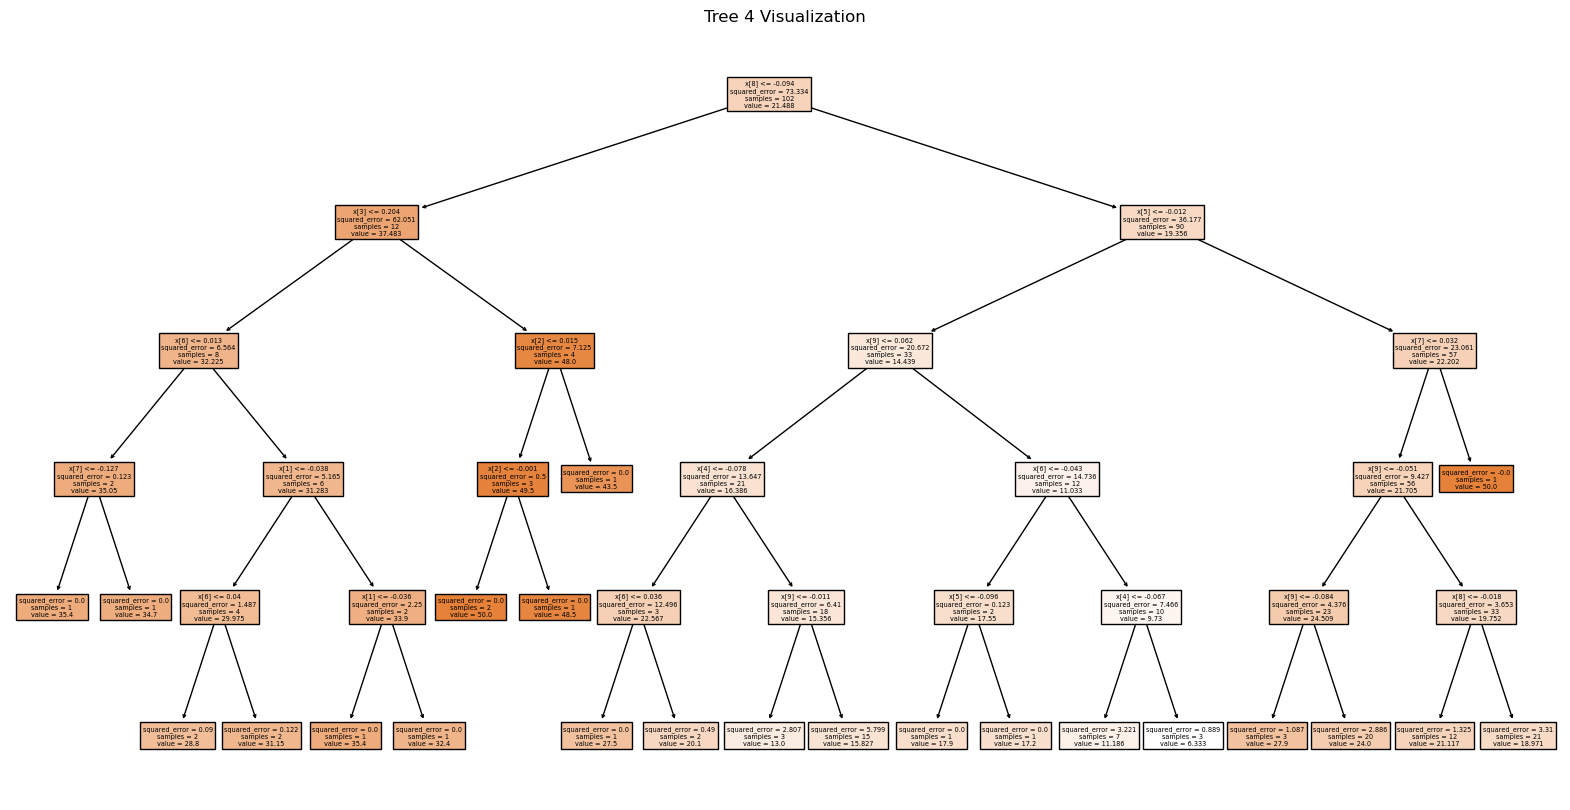

Tree 5 feature importances:
[0.00000000e+00 5.79930760e-03 2.07997164e-04 9.20181765e-02
 2.60558554e-02 1.74656413e-01 1.99607714e-02 1.12809540e-01
 4.87352594e-01 8.11393452e-02]
Tree 5 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_1 <= -0.08
|   |   |   |--- feature_4 <= 0.06
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_4 >  0.06
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_1 >  -0.08
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_4 <= 0.06
|   |   |   |   |   |--- value: [32.40]
|   |   |   |   |--- feature_4 >  0.06
|   |   |   |   |   |--- value: [35.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_7 <= -0.15
|   |   |   |--- feature_2 <= -0.00
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature

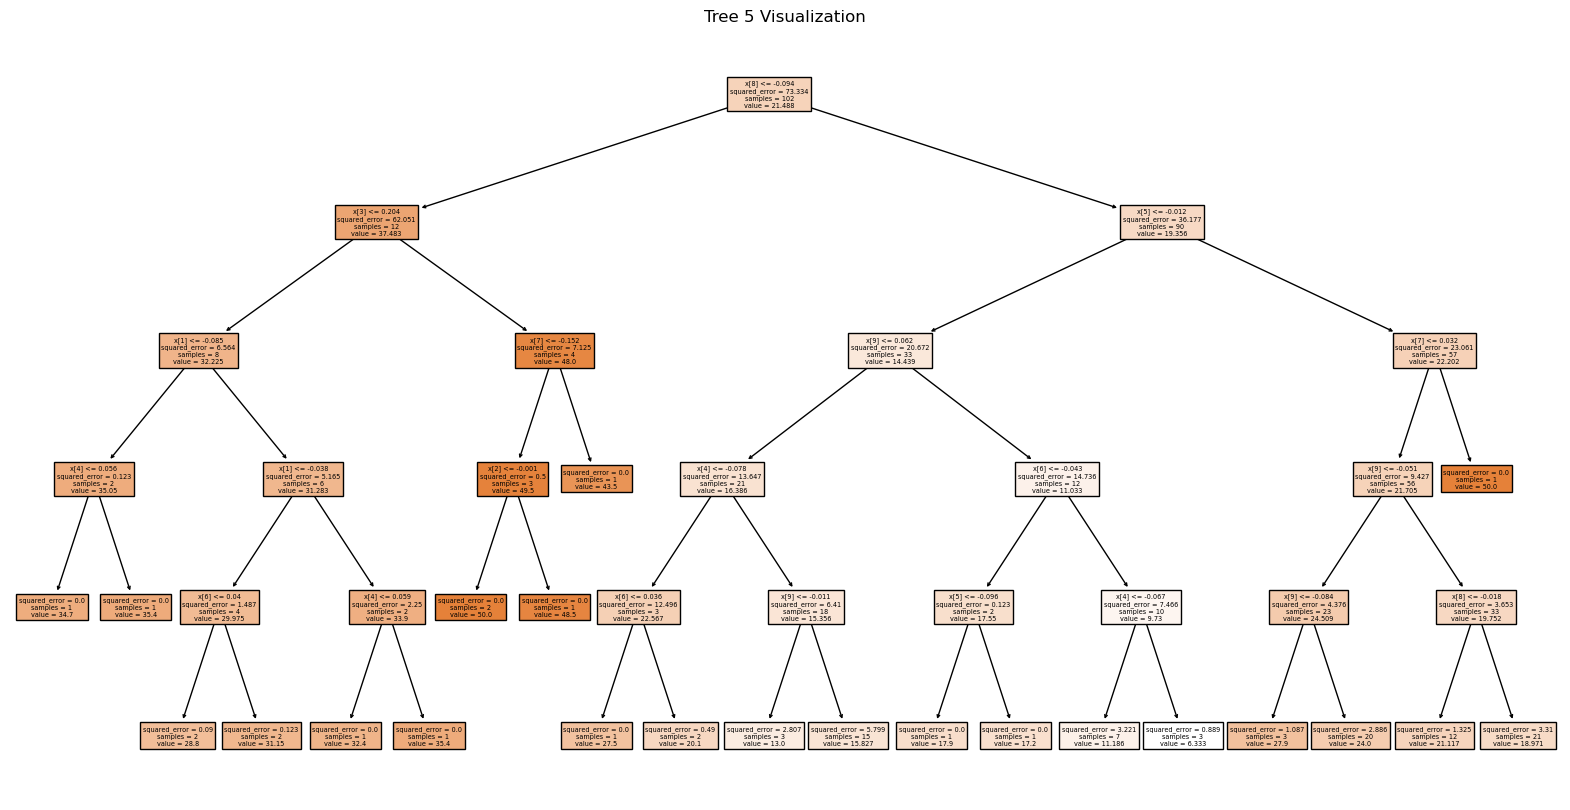

Tree 6 feature importances:
[0.00062399 0.00579931 0.         0.09205215 0.03049405 0.17462244
 0.01489858 0.10906559 0.48735259 0.08509129]
Tree 6 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_1 <= -0.08
|   |   |   |--- feature_3 <= 0.17
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_3 >  0.17
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_1 >  -0.08
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_0 <= -0.17
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_0 >  -0.17
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_9 <= -0.12
|   |   |   |--- value: [43.50]
|   |   |--- feature_9 >  -0.12
|   |   |   |--- feature_9 <= -0.11
|   |   |   |   |--- value: [50.00]

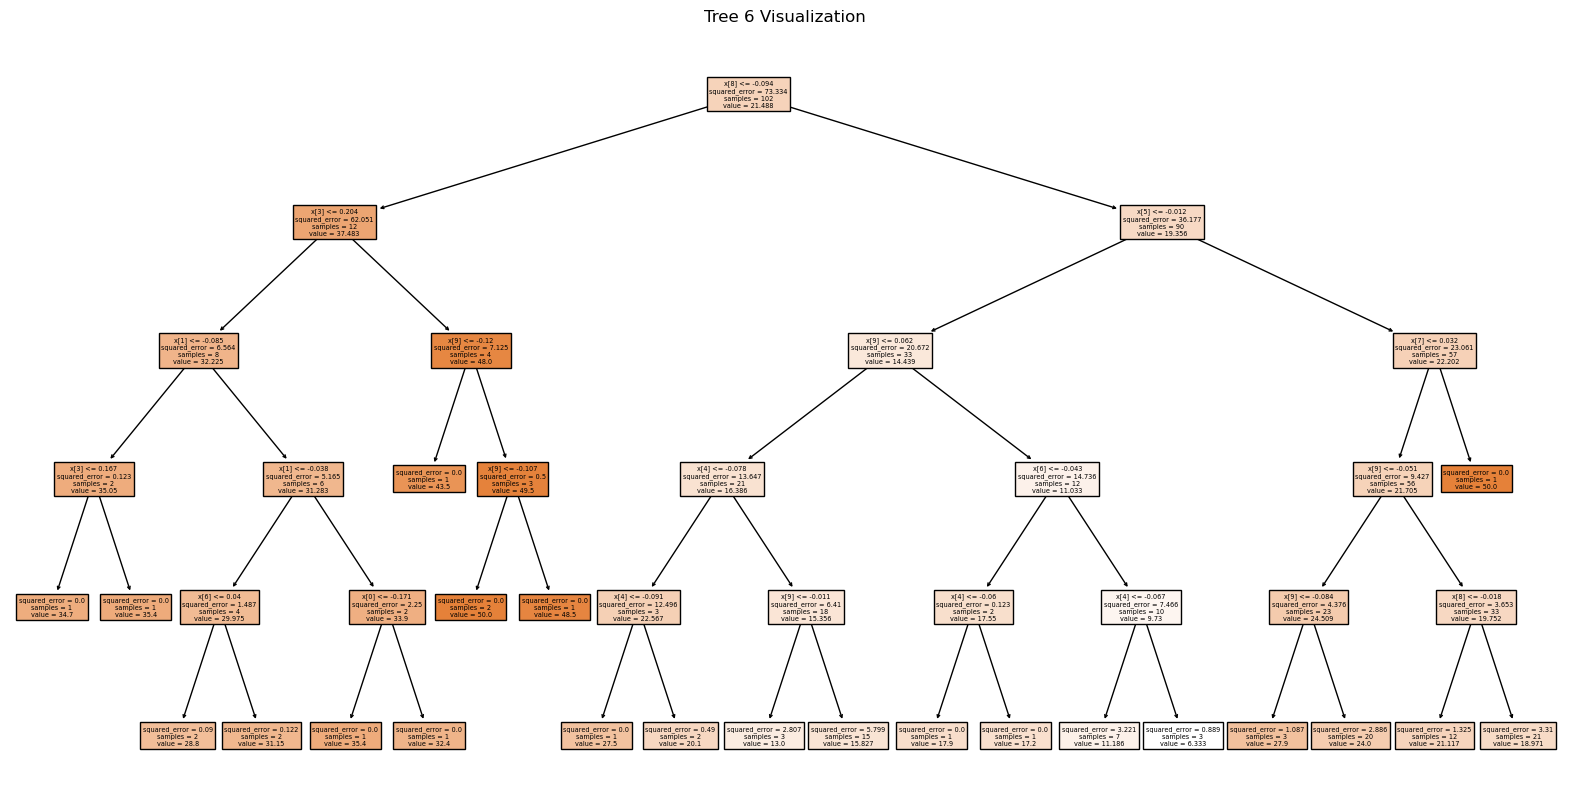

Tree 7 feature importances:
[0.03033519 0.00305629 0.00374395 0.09205215 0.03046008 0.17462244
 0.0178496  0.10906559 0.48735259 0.05146211]
Tree 7 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_6 <= 0.01
|   |   |   |--- feature_3 <= 0.17
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_3 >  0.17
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_6 >  0.01
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_9 <= -0.09
|   |   |   |   |   |--- value: [32.40]
|   |   |   |   |--- feature_9 >  -0.09
|   |   |   |   |   |--- value: [35.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_2 <= 0.01
|   |   |   |--- feature_1 <= -0.06
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_1 >  -0.06
|   |   |   |   |--- value: [4

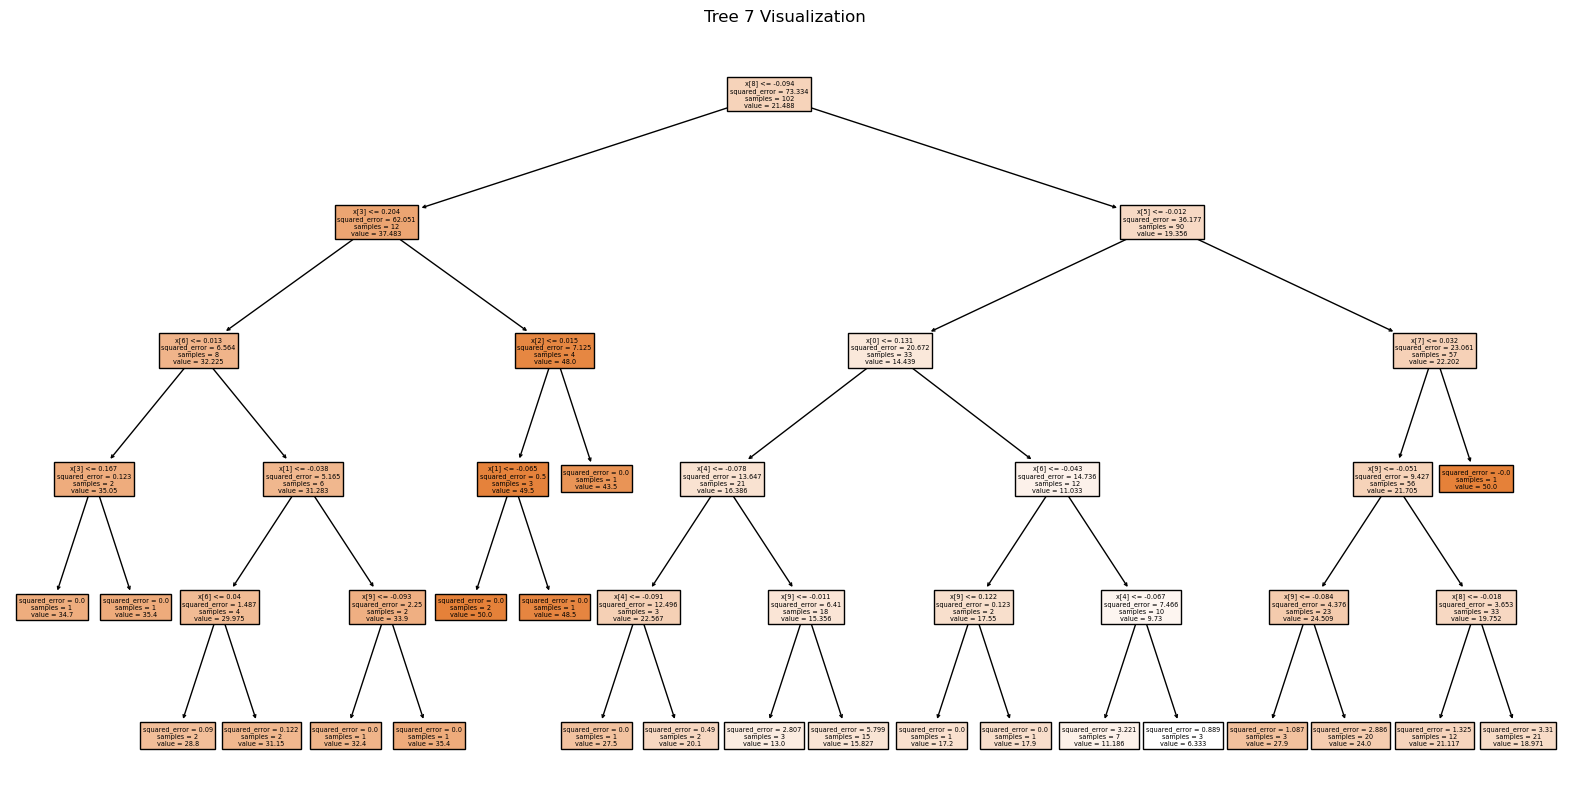

Tree 8 feature importances:
[0.03036917 0.00579931 0.00374395 0.09201818 0.02539789 0.28368803
 0.01489858 0.         0.49307275 0.05101215]
Tree 8 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_1 <= -0.08
|   |   |   |--- feature_0 <= -0.16
|   |   |   |   |--- value: [35.40]
|   |   |   |--- feature_0 >  -0.16
|   |   |   |   |--- value: [34.70]
|   |   |--- feature_1 >  -0.08
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_8 <= -0.14
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_8 >  -0.14
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_2 <= 0.01
|   |   |   |--- feature_9 <= -0.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_9 >  -0.11
|   |   |   |   |--- value

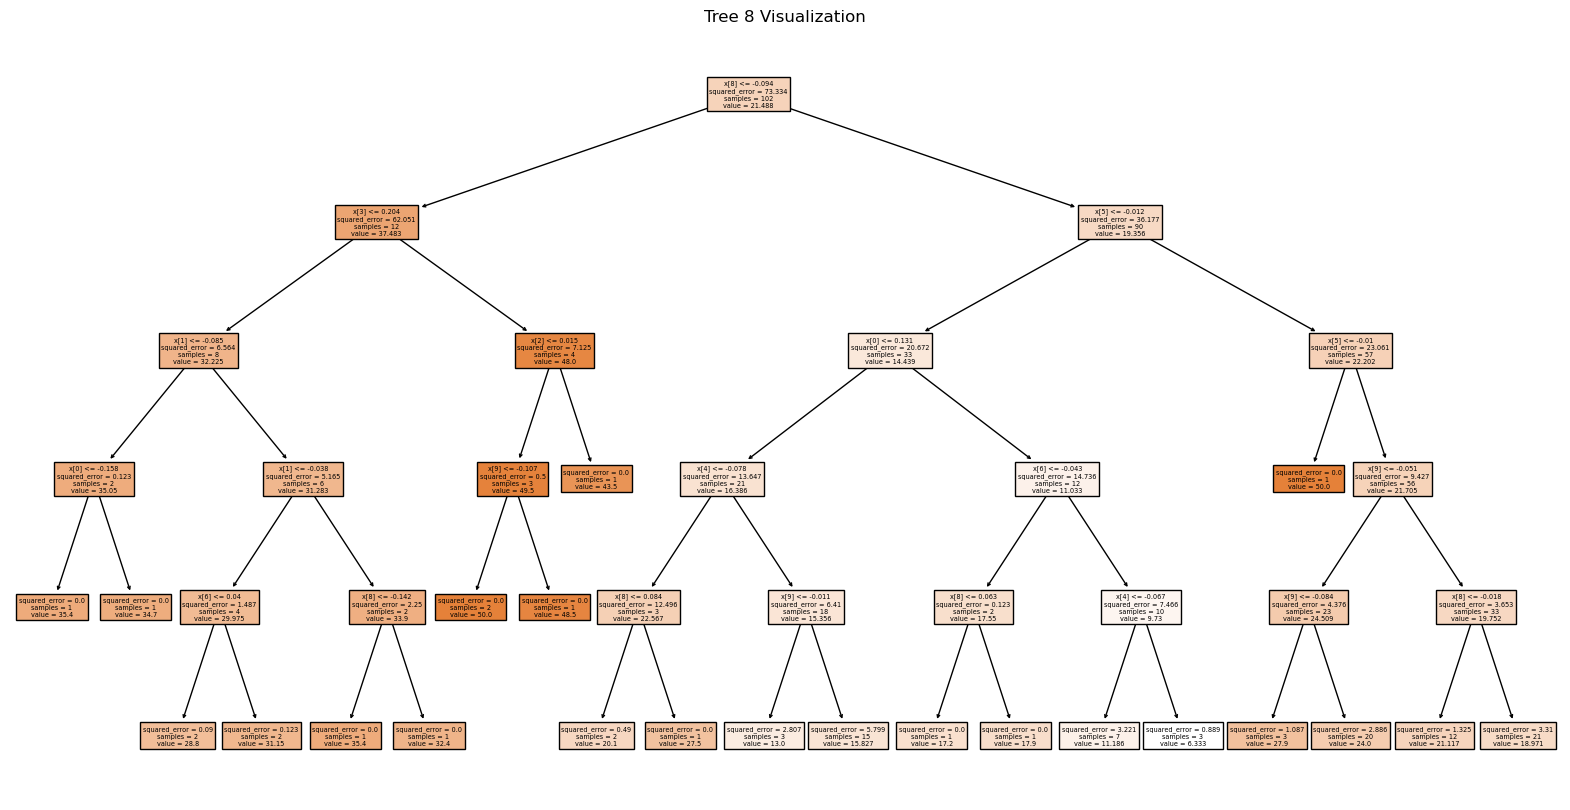

Tree 9 feature importances:
[2.07997164e-04 5.79930760e-03 0.00000000e+00 9.20181765e-02
 3.04600798e-02 1.74622440e-01 1.48985826e-02 1.09689583e-01
 4.91130516e-01 8.11733181e-02]
Tree 9 structure:
|--- feature_8 <= -0.09
|   |--- feature_3 <= 0.20
|   |   |--- feature_1 <= -0.08
|   |   |   |--- feature_9 <= -0.11
|   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_9 >  -0.11
|   |   |   |   |--- value: [35.40]
|   |   |--- feature_1 >  -0.08
|   |   |   |--- feature_1 <= -0.04
|   |   |   |   |--- feature_6 <= 0.04
|   |   |   |   |   |--- value: [28.80]
|   |   |   |   |--- feature_6 >  0.04
|   |   |   |   |   |--- value: [31.15]
|   |   |   |--- feature_1 >  -0.04
|   |   |   |   |--- feature_7 <= -0.15
|   |   |   |   |   |--- value: [35.40]
|   |   |   |   |--- feature_7 >  -0.15
|   |   |   |   |   |--- value: [32.40]
|   |--- feature_3 >  0.20
|   |   |--- feature_8 <= -0.16
|   |   |   |--- feature_0 <= -0.22
|   |   |   |   |--- value: [50.00]
|   |   |   |--- fea

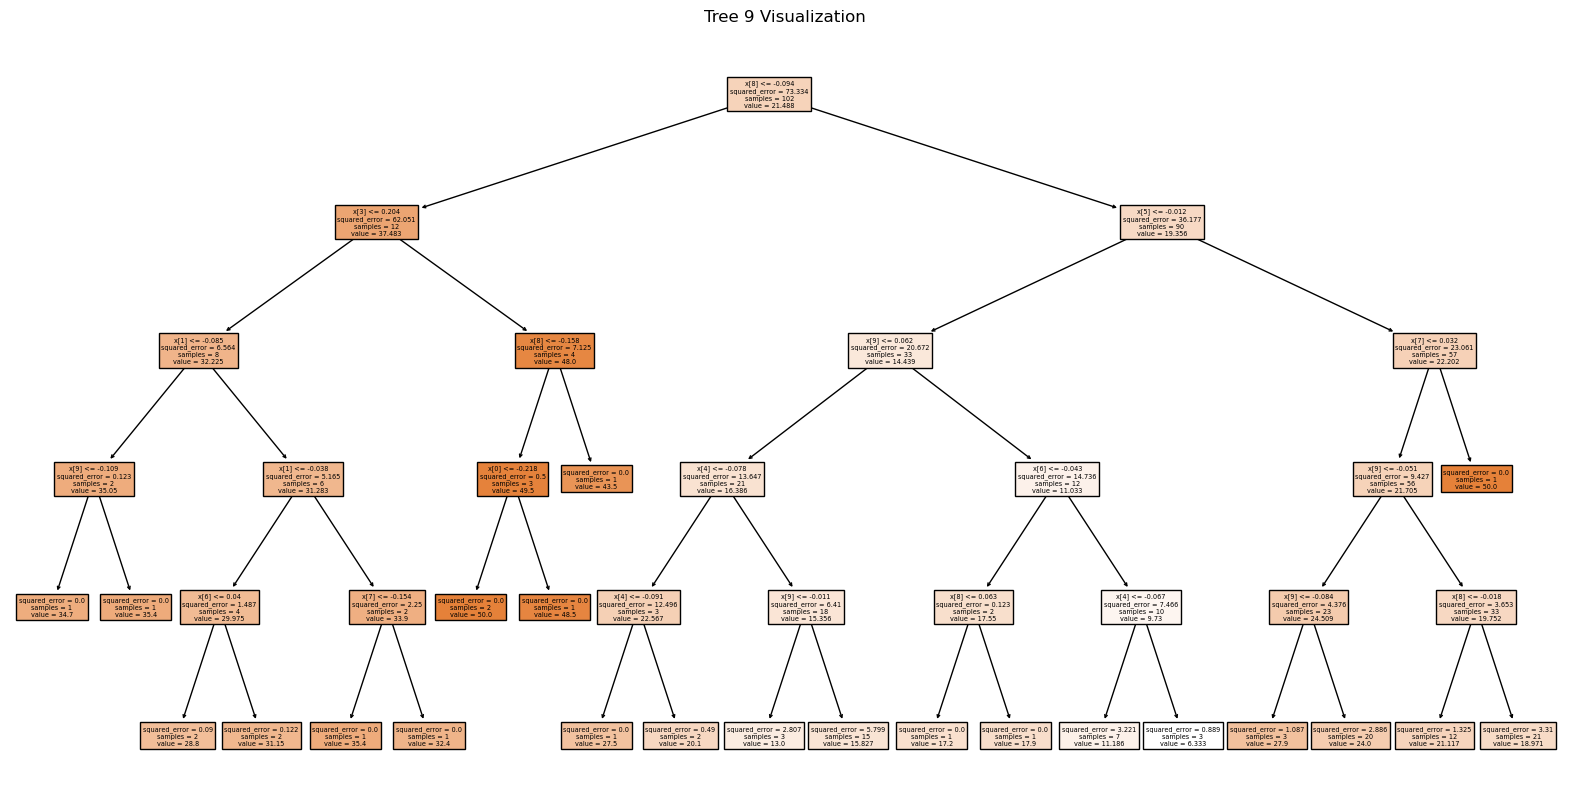

In [15]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()